# Data Description

<table>
    <tr>
        <th>Variable</th>
        <th>Definition</th>
    </tr>
    <tr>
        <td>PassengerId</td>
        <td>A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and 
            pp is their number within the group. People in a group are often family members, but not always.</td>
    </tr>
    <tr>
        <td>HomePlanet</td>
        <td>The planet the passenger departed from, typically their planet of permanent residence.</td>
    </tr>
    <tr>
        <td>CryoSleep</td>
        <td>Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in 
            cryosleep are confined to their cabins.</td>
    </tr>
    <tr>
        <td>Cabin</td>
        <td>The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for 
            Starboard.</td>
    </tr>
    <tr>
        <td>Destination</td>
        <td>The planet the passenger will be debarking to.</td>
    </tr>
    <tr>
        <td>Age</td>
        <td>The age of the passenger.</td>
    </tr>
    <tr>
        <td>VIP</td>
        <td>Whether the passenger has paid for special VIP service during the voyage.</td>
    </tr>
    <tr>
        <td>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</td>
        <td>Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.</td>
    </tr>
    <tr>
        <td>Name</td>
        <td>The first and last names of the passenger.</td>
    </tr>
    <tr>
        <td>Transported</td>
        <td>Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.</td>
    </tr>
</table>


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Training Data

In [2]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.drop(['PassengerId','Name'], inplace=True, axis=1)

# Information of Data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


# Exploratory Data Analysis

In [5]:
print('Shape of Data:',train.shape)

Shape of Data: (8693, 12)


In [6]:
print('\nStatistical Sumary of Data:\n')
train.describe(include='all')


Statistical Sumary of Data:



,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693
unique,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,True
freq,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,4378
mean,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN
std,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN


In [7]:
print('\nMissing Data:\n')
missing=train.isna().sum()
percent=train.isna().sum()*100/train.shape[0]
print(pd.concat([missing,percent],keys=['Count','Percent'],axis=1))


Missing Data:

              Count   Percent
HomePlanet      201  2.312205
CryoSleep       217  2.496261
Cabin           199  2.289198
Destination     182  2.093639
Age             179  2.059128
VIP             203  2.335212
RoomService     181  2.082135
FoodCourt       183  2.105142
ShoppingMall    208  2.392730
Spa             183  2.105142
VRDeck          188  2.162660
Transported       0  0.000000


# Spliting the Features

In [8]:
numerical_features=train.select_dtypes(include=['int64', 'float64']).columns
categorical_features=train.select_dtypes(include=['object']).columns
bool_features=train.select_dtypes(include=['bool']).columns

print('\nNumerical Features:',numerical_features)
print('\nCategorical Features:',categorical_features)
print('\nBool Features:',bool_features)


Numerical Features: Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

Categorical Features: Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'], dtype='object')

Bool Features: Index(['Transported'], dtype='object')


# Preprocessing the Data

### Preprocessing HomePlanet

In [9]:
print('\nUnique HomePlanets:\n')
print(train['HomePlanet'].unique())


Unique HomePlanets:

['Europa' 'Earth' 'Mars' nan]


In [10]:
print('\nCounts of Unique HomePlanet:\n')
print(train['HomePlanet'].value_counts())


Counts of Unique HomePlanet:

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


### CryoSleep

In [11]:
print('\nUnique CryoSleep:\n')
print(train['CryoSleep'].unique())


Unique CryoSleep:

[False True nan]


In [12]:
print('\nCounts of Unique CryoSleep:\n')
print(train['CryoSleep'].value_counts())


Counts of Unique CryoSleep:

CryoSleep
False    5439
True     3037
Name: count, dtype: int64


### Cabin

In [13]:
print('\nUnique Cabin:\n')
print(train['Cabin'].unique())


Unique Cabin:

['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']


In [14]:
print('\nCounts of Unique Cabin:\n')
print(train['Cabin'].value_counts())


Counts of Unique Cabin:

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64


In [15]:
def preprocess_cabin(df):
    df[['Deck','Cabin_No','Side']]=df['Cabin'].str.split('/',expand=True)
    df.drop('Cabin',inplace=True,axis=1)

preprocess_cabin(train)

### Destination

In [16]:
print('\nUnique Destination:\n')
print(train['Destination'].unique())


Unique Destination:

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


In [17]:
print('\nCounts of Unique Destination:\n')
print(train['Destination'].value_counts())


Counts of Unique Destination:

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


### VIP

In [18]:
print('\nUnique VIP:\n')
print(train['VIP'].unique())


Unique VIP:

[False True nan]


In [19]:
print('\nCounts of Unique VIP:\n')
print(train['VIP'].value_counts())


Counts of Unique VIP:

VIP
False    8291
True      199
Name: count, dtype: int64


### Age

In [20]:
print('\nUnique Age:\n')
print(train['Age'].unique())


Unique Age:

[39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]


In [21]:
print('\nCounts of Unique Age:\n')
print(train['Age'].value_counts())


Counts of Unique Age:

Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64


### RoomService

In [22]:
print('\nUnique RoomService:\n')
print(train['RoomService'].unique())


Unique RoomService:

[   0.  109.   43. ... 1569. 8586.  745.]


In [23]:
print('\nCounts of Unique RoomService:\n')
print(train['RoomService'].value_counts())


Counts of Unique RoomService:

RoomService
0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: count, Length: 1273, dtype: int64


### FoodCourt

In [24]:
print('\nUnique FoodCourt:\n')
print(train['FoodCourt'].unique())


Unique FoodCourt:

[   0.    9. 3576. ... 3208. 6819. 4688.]


In [25]:
print('\nCounts of Unique FoodCourt:\n')
print(train['FoodCourt'].value_counts())


Counts of Unique FoodCourt:

FoodCourt
0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: count, Length: 1507, dtype: int64


### ShoppingMall

In [26]:
print('\nUnique ShoppingMall:\n')
print(train['ShoppingMall'].unique())


Unique ShoppingMall:

[   0.   25.  371. ... 1085.  510. 1872.]


In [27]:
print('\nCounts of Unique ShoppingMall:\n')
print(train['ShoppingMall'].value_counts())


Counts of Unique ShoppingMall:

ShoppingMall
0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: count, Length: 1115, dtype: int64


### Spa

In [28]:
print('\nUnique Spa:\n')
print(train['Spa'].unique())


Unique Spa:

[   0.  549. 6715. ... 2868. 1107. 1643.]


In [29]:
print('\nCounts of Unique Spa:\n')
print(train['Spa'].value_counts())


Counts of Unique Spa:

Spa
0.0       5324
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: count, Length: 1327, dtype: int64


### VRDeck

In [30]:
print('\nUnique VRDeck:\n')
print(train['VRDeck'].unique())


Unique VRDeck:

[   0.   44.   49. ... 1164.  971. 3235.]


In [31]:
print('\nCounts of Unique VRDeck:\n')
print(train['VRDeck'].value_counts())


Counts of Unique VRDeck:

VRDeck
0.0       5495
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
408.0        1
876.0        1
2891.0       1
2102.0       1
3235.0       1
Name: count, Length: 1306, dtype: int64


### Transported

In [32]:
print('\nUnique Transported:\n')
print(train['Transported'].unique())


Unique Transported:

[False  True]


In [33]:
print('\nCounts of Unique Transported:\n')
print(train['Transported'].value_counts())


Counts of Unique Transported:

Transported
True     4378
False    4315
Name: count, dtype: int64


# Dealing with NullValues

In [34]:
def preprocess_null_values(df):
    numerical_features=df.select_dtypes(include=['int64', 'float64']).columns
    categorical_features=df.select_dtypes(include=['object']).columns
    bool_features=df.select_dtypes(include=['bool']).columns
    
    for i in numerical_features:
        df[i]=df[i].fillna(df[i].mean())

    for i in categorical_features:
        df[i]=df[i].fillna(df[i].mode()[0])

preprocess_null_values(train)    

# Data Visualization

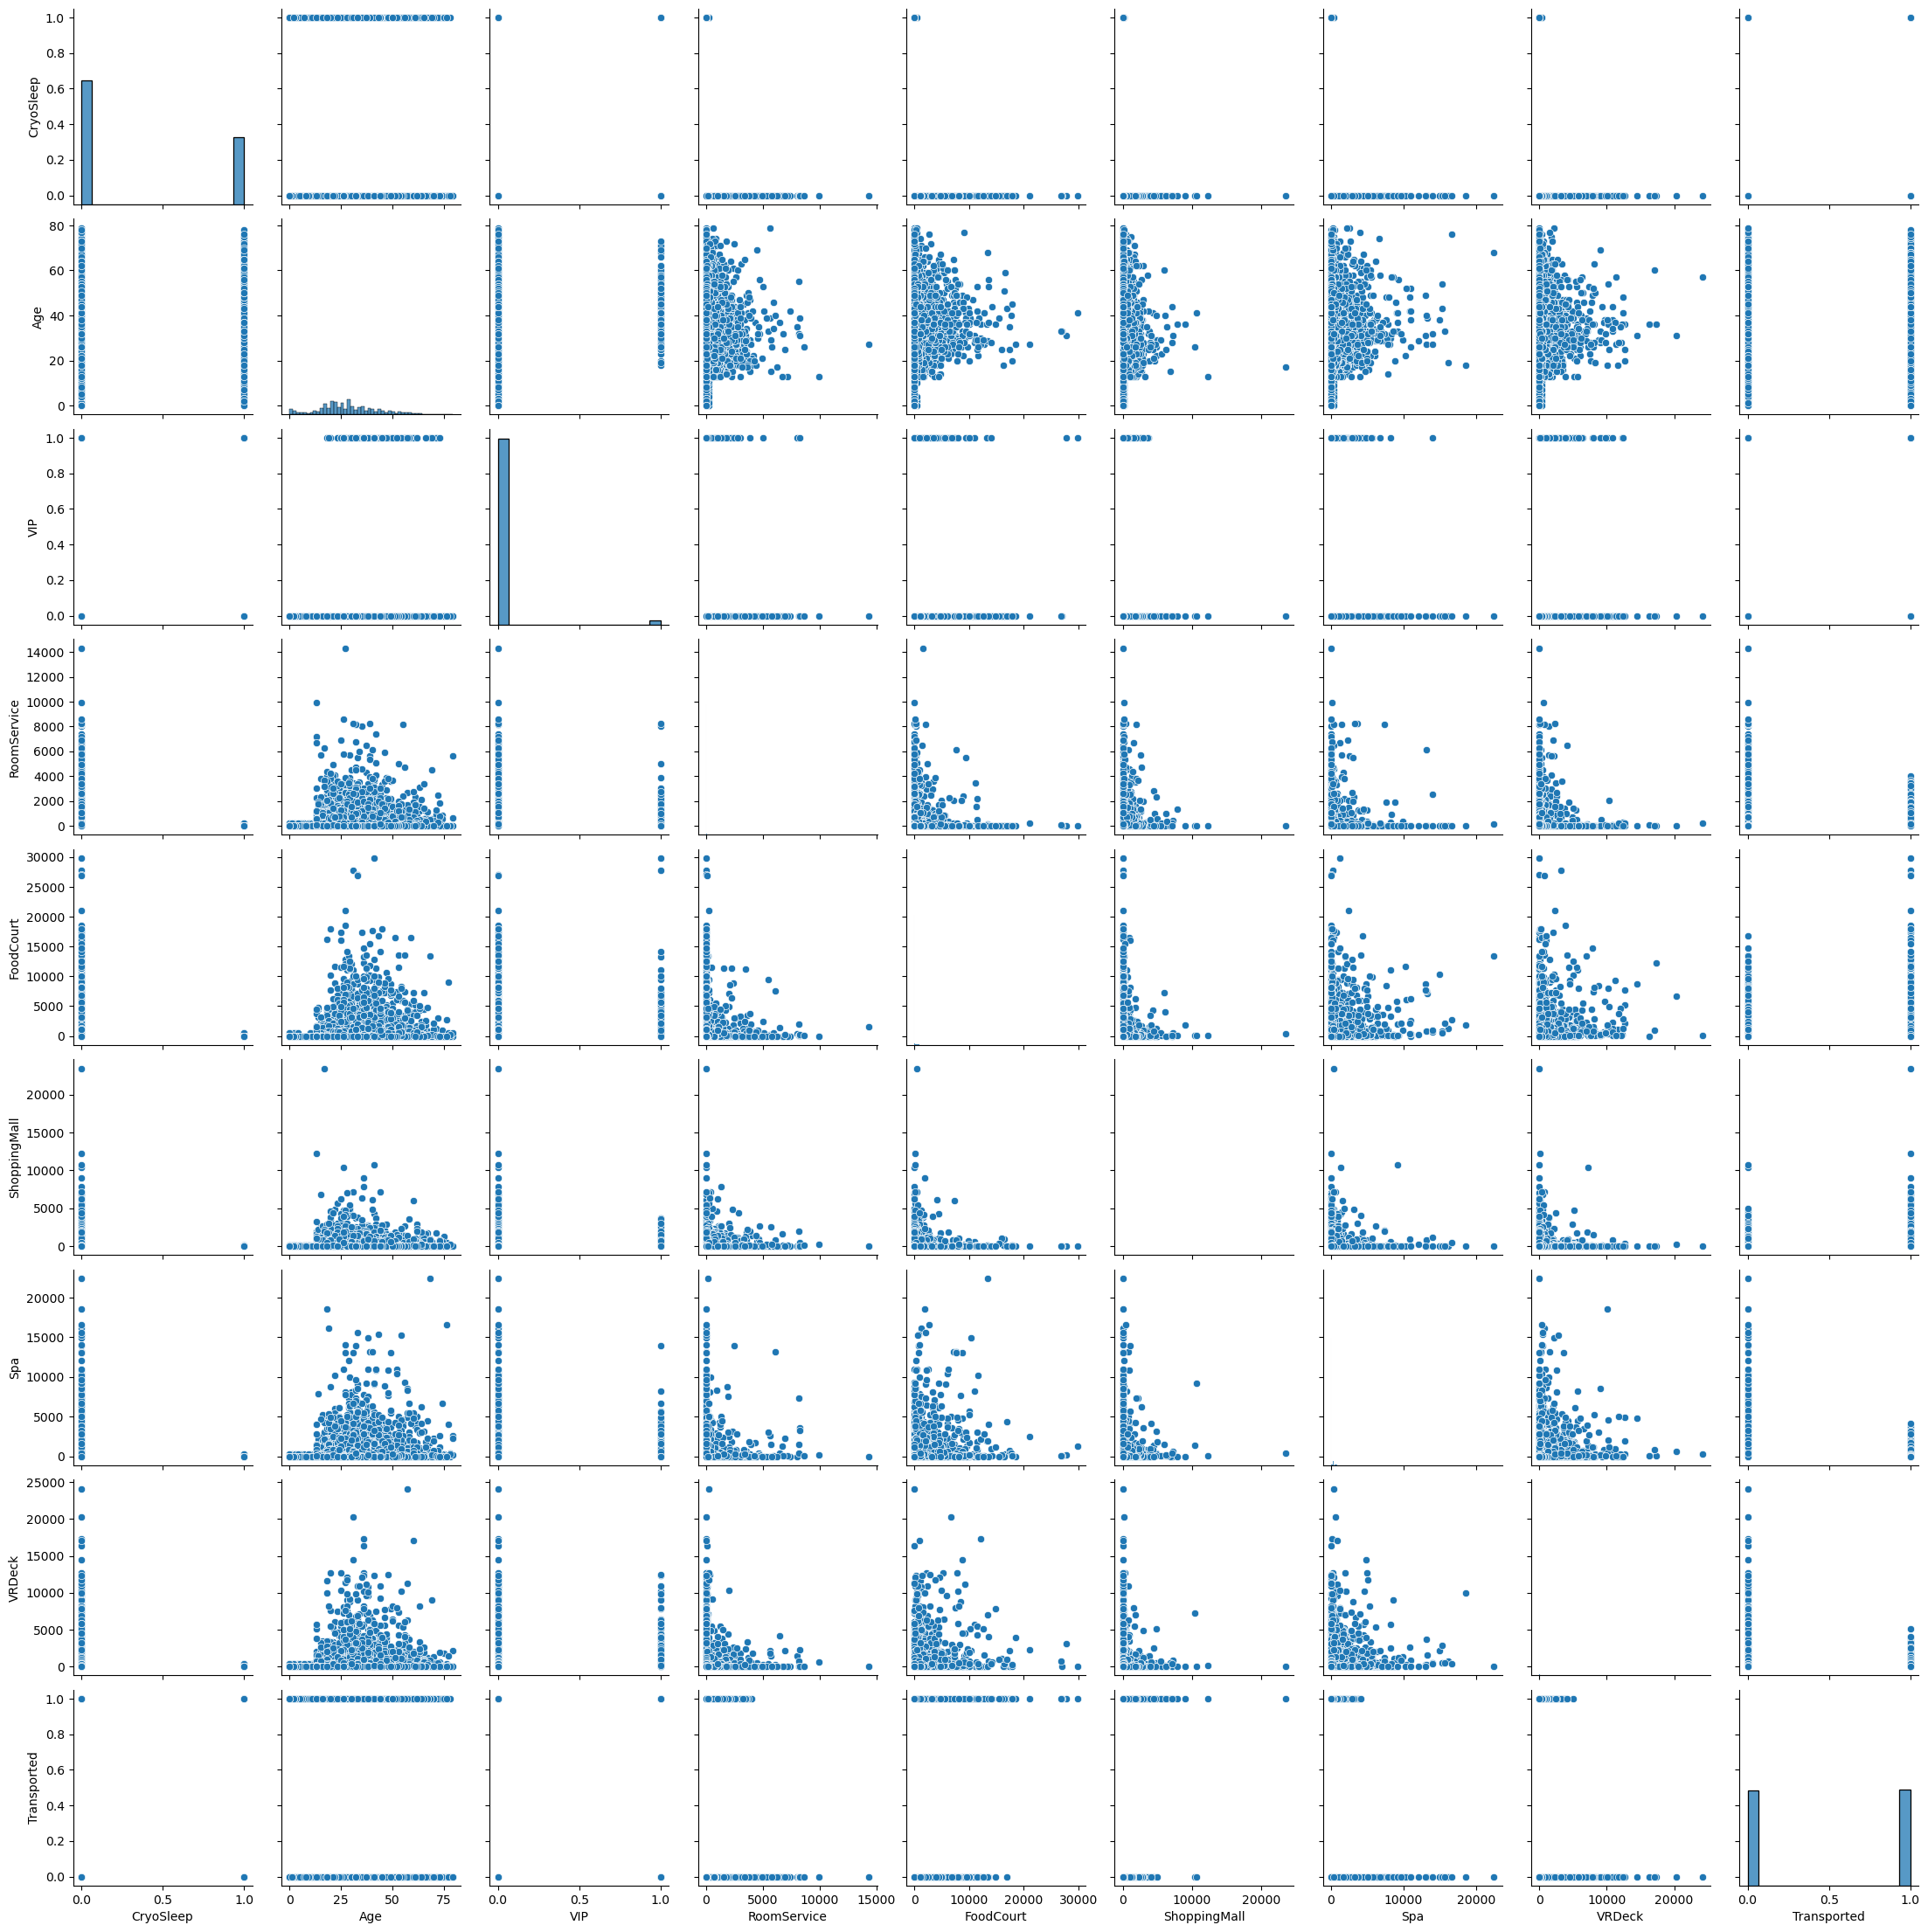

In [35]:
sns.pairplot(data=train)

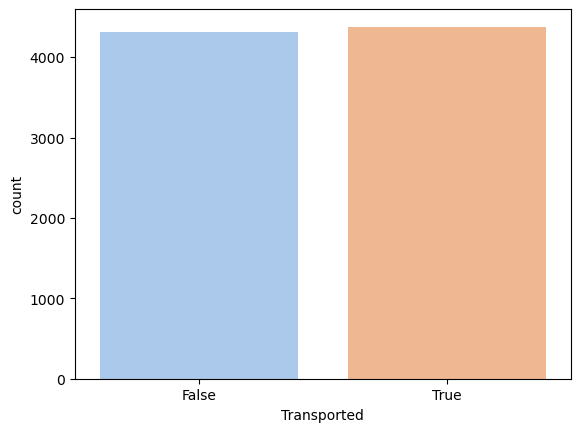

             Count    Percent
Transported                  
True          4378  50.362361
False         4315  49.637639


In [36]:
sns.countplot(x='Transported',data=train,palette=sns.color_palette("pastel"))
plt.show()

count=train['Transported'].value_counts()
percent=train['Transported'].value_counts()*100/train.shape[0]
print(pd.concat([count, percent], axis=1, keys=["Count", "Percent"]))

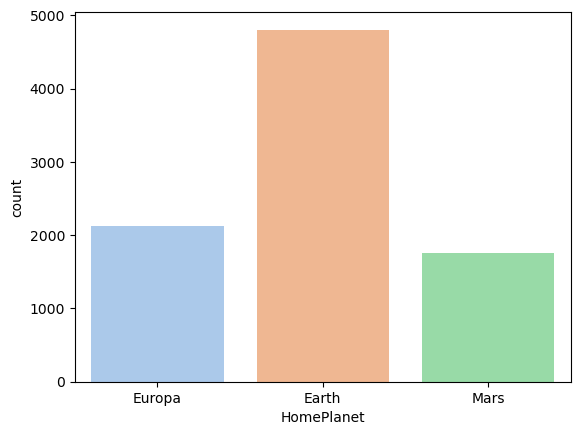

            Count    Percent
HomePlanet                  
Earth        4803  55.251352
Europa       2131  24.513977
Mars         1759  20.234672


In [37]:
sns.countplot(x='HomePlanet',data=train,palette=sns.color_palette("pastel"))
plt.show()

count=train['HomePlanet'].value_counts()
percent=train['HomePlanet'].value_counts()*100/train.shape[0]
print(pd.concat([count, percent], axis=1, keys=["Count", "Percent"]))

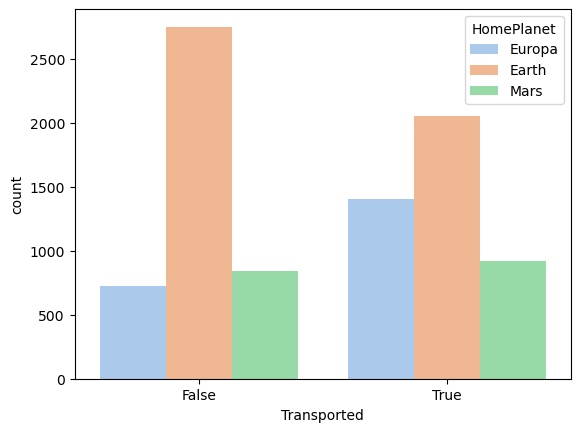


HomePlanet Europa:

             Count    Percent
Transported                  
True          1404  65.884561
False          727  34.115439

HomePlanet Earth:

             Count    Percent
Transported                  
False         2749  57.235061
True          2054  42.764939

HomePlanet Mars:

             Count    Percent
Transported                  
True           920  52.302445
False          839  47.697555


In [38]:
sns.countplot(x='Transported',hue='HomePlanet',data=train,palette=sns.color_palette("pastel"))
plt.show()

for i in train['HomePlanet'].unique():
    print(f'\nHomePlanet {i}:\n')
    HomePlanet_count=train['Transported'].loc[train['HomePlanet']==i].value_counts()
    HomePlanet_percent=train['Transported'].loc[train['HomePlanet']==i].value_counts()*100/train['Transported'].loc[train['HomePlanet']==i].shape[0]
    print(pd.concat([HomePlanet_count, HomePlanet_percent], axis=1, keys=["Count", "Percent"]))

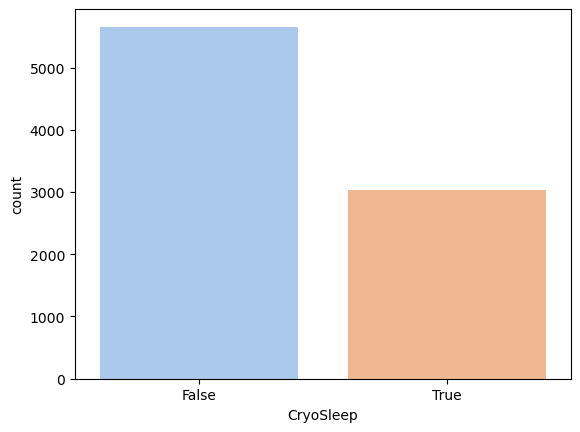

           Count    Percent
CryoSleep                  
False       5656  65.063844
True        3037  34.936156


In [39]:
sns.countplot(x='CryoSleep',data=train,palette=sns.color_palette("pastel"))
plt.show()

count=train['CryoSleep'].value_counts()
percent=train['CryoSleep'].value_counts()*100/train.shape[0]
print(pd.concat([count, percent], axis=1, keys=["Count", "Percent"]))

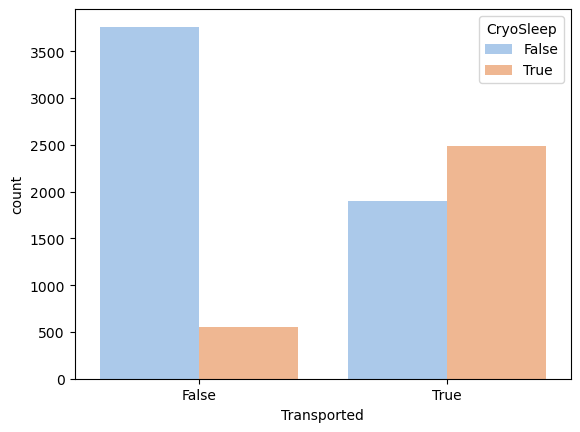


CryoSleep False:

             Count    Percent
Transported                  
False         3761  66.495757
True          1895  33.504243

CryoSleep True:

             Count    Percent
Transported                  
True          2483  81.758314
False          554  18.241686


In [40]:
sns.countplot(x='Transported',hue='CryoSleep',data=train,palette=sns.color_palette("pastel"))
plt.show()

for i in train['CryoSleep'].unique():
    print(f'\nCryoSleep {i}:\n')
    HomePlanet_count=train['Transported'].loc[train['CryoSleep']==i].value_counts()
    HomePlanet_percent=train['Transported'].loc[train['CryoSleep']==i].value_counts()*100/train['Transported'].loc[train['CryoSleep']==i].shape[0]
    print(pd.concat([HomePlanet_count, HomePlanet_percent], axis=1, keys=["Count", "Percent"]))

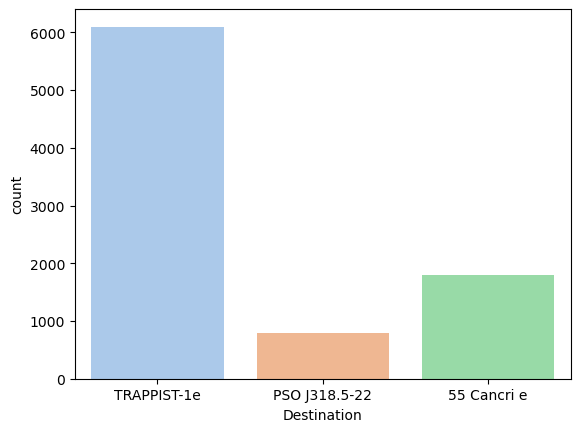

               Count    Percent
Destination                    
TRAPPIST-1e     6097  70.136892
55 Cancri e     1800  20.706315
PSO J318.5-22    796   9.156793


In [41]:
sns.countplot(x='Destination',data=train,palette=sns.color_palette("pastel"))
plt.show()

count=train['Destination'].value_counts()
percent=train['Destination'].value_counts()*100/train.shape[0]
print(pd.concat([count, percent], axis=1, keys=["Count", "Percent"]))

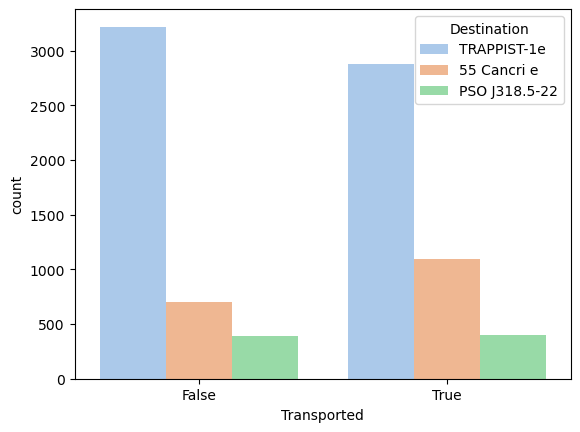


Destination TRAPPIST-1e:

             Count    Percent
Transported                  
False         3218  52.780056
True          2879  47.219944

Destination PSO J318.5-22:

             Count    Percent
Transported                  
True           401  50.376884
False          395  49.623116

Destination 55 Cancri e:

             Count  Percent
Transported                
True          1098     61.0
False          702     39.0


In [42]:
sns.countplot(x='Transported',hue='Destination',data=train,palette=sns.color_palette("pastel"))
plt.show()

for i in train['Destination'].unique():
    print(f'\nDestination {i}:\n')
    HomePlanet_count=train['Transported'].loc[train['Destination']==i].value_counts()
    HomePlanet_percent=train['Transported'].loc[train['Destination']==i].value_counts()*100/train['Transported'].loc[train['Destination']==i].shape[0]
    print(pd.concat([HomePlanet_count, HomePlanet_percent], axis=1, keys=["Count", "Percent"]))

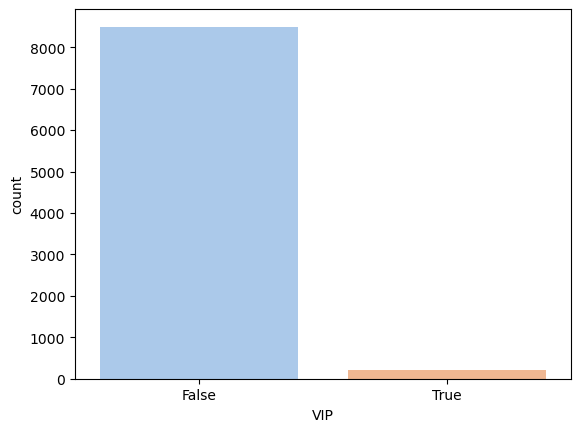

       Count    Percent
VIP                    
False   8494  97.710802
True     199   2.289198


In [43]:
sns.countplot(x='VIP',data=train,palette=sns.color_palette("pastel"))
plt.show()

count=train['VIP'].value_counts()
percent=train['VIP'].value_counts()*100/train.shape[0]
print(pd.concat([count, percent], axis=1, keys=["Count", "Percent"]))

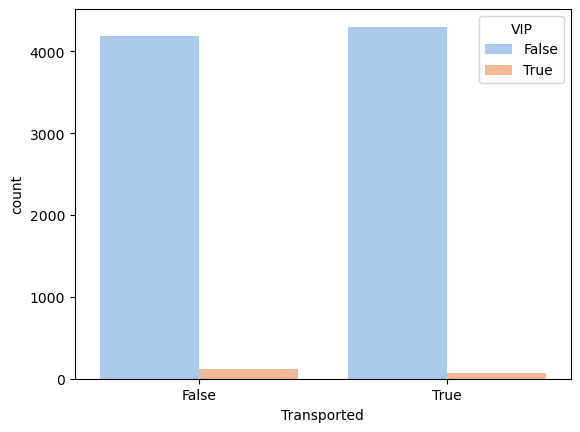


VIP False:

             Count    Percent
Transported                  
True          4302  50.647516
False         4192  49.352484

VIP True:

             Count    Percent
Transported                  
False          123  61.809045
True            76  38.190955


In [44]:
sns.countplot(x='Transported',hue='VIP',data=train,palette=sns.color_palette("pastel"))
plt.show()

for i in train['VIP'].unique():
    print(f'\nVIP {i}:\n')
    HomePlanet_count=train['Transported'].loc[train['VIP']==i].value_counts()
    HomePlanet_percent=train['Transported'].loc[train['VIP']==i].value_counts()*100/train['Transported'].loc[train['VIP']==i].shape[0]
    print(pd.concat([HomePlanet_count, HomePlanet_percent], axis=1, keys=["Count", "Percent"]))

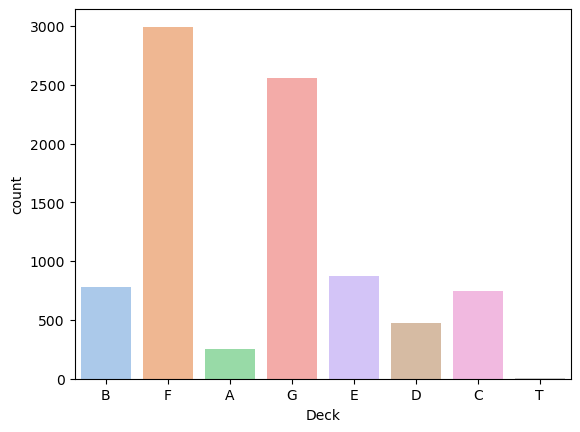

      Count    Percent
Deck                  
F      2993  34.430001
G      2559  29.437478
E       876  10.077074
B       779   8.961233
C       747   8.593121
D       478   5.498677
A       256   2.944898
T         5   0.057518


In [45]:
sns.countplot(x='Deck',data=train,palette=sns.color_palette("pastel"))
plt.show()

count=train['Deck'].value_counts()
percent=train['Deck'].value_counts()*100/train.shape[0]
print(pd.concat([count, percent], axis=1, keys=["Count", "Percent"]))

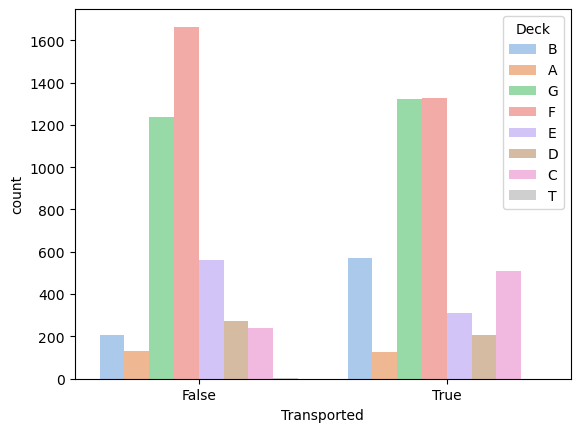


Deck B:

             Count    Percent
Transported                  
True           572  73.427471
False          207  26.572529

Deck F:

             Count    Percent
Transported                  
False         1664  55.596392
True          1329  44.403608

Deck A:

             Count    Percent
Transported                  
False          129  50.390625
True           127  49.609375

Deck G:

             Count    Percent
Transported                  
True          1321  51.621727
False         1238  48.378273

Deck E:

             Count    Percent
Transported                  
False          563  64.269406
True           313  35.730594

Deck D:

             Count    Percent
Transported                  
False          271  56.694561
True           207  43.305439

Deck C:

             Count    Percent
Transported                  
True           508  68.005355
False          239  31.994645

Deck T:

             Count  Percent
Transported                
False            4     8

In [46]:
sns.countplot(x='Transported',hue='Deck',data=train,palette=sns.color_palette("pastel"))
plt.show()

for i in train['Deck'].unique():
    print(f'\nDeck {i}:\n')
    HomePlanet_count=train['Transported'].loc[train['Deck']==i].value_counts()
    HomePlanet_percent=train['Transported'].loc[train['Deck']==i].value_counts()*100/train['Transported'].loc[train['Deck']==i].shape[0]
    print(pd.concat([HomePlanet_count, HomePlanet_percent], axis=1, keys=["Count", "Percent"]))

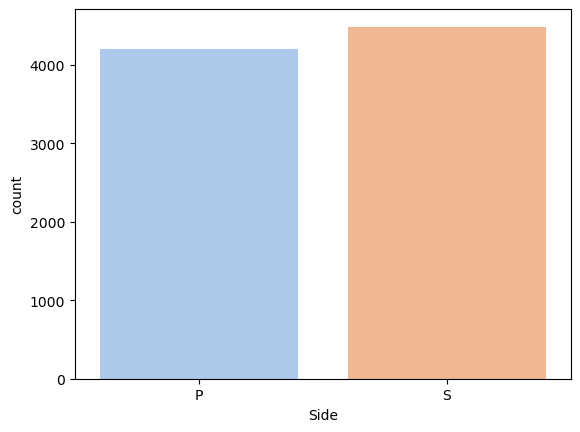

      Count    Percent
Side                  
S      4487  51.616243
P      4206  48.383757


In [47]:
sns.countplot(x='Side',data=train,palette=sns.color_palette("pastel"))
plt.show()

count=train['Side'].value_counts()
percent=train['Side'].value_counts()*100/train.shape[0]
print(pd.concat([count, percent], axis=1, keys=["Count", "Percent"]))

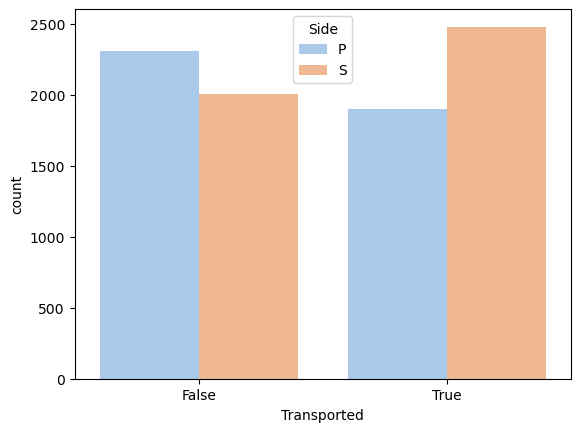


Side P:

             Count   Percent
Transported                 
False         2308  54.87399
True          1898  45.12601

Side S:

             Count    Percent
Transported                  
True          2480  55.270782
False         2007  44.729218


In [48]:
sns.countplot(x='Transported',hue='Side',data=train,palette=sns.color_palette("pastel"))
plt.show()

for i in train['Side'].unique():
    print(f'\nSide {i}:\n')
    HomePlanet_count=train['Transported'].loc[train['Side']==i].value_counts()
    HomePlanet_percent=train['Transported'].loc[train['Side']==i].value_counts()*100/train['Transported'].loc[train['Side']==i].shape[0]
    print(pd.concat([HomePlanet_count, HomePlanet_percent], axis=1, keys=["Count", "Percent"]))

Text(0.5, 1.0, 'Transported')

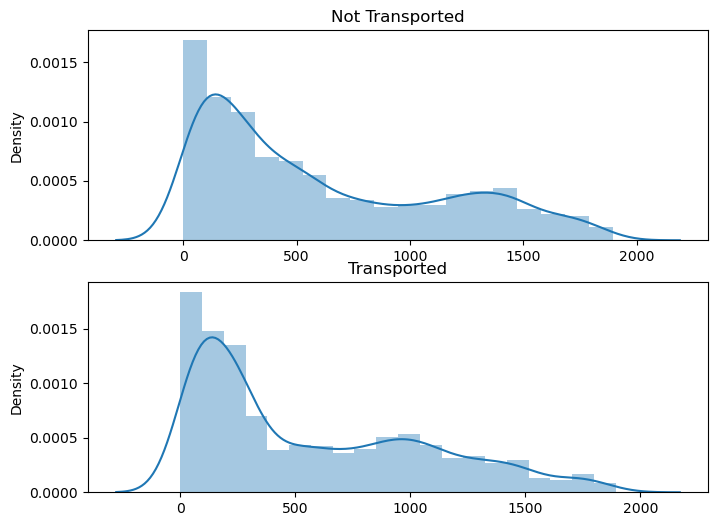

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.distplot(x=train["Cabin_No"][train["Transported"]==0],ax = axes[0])
axes[0].set_title("Not Transported")
sns.distplot(x=train["Cabin_No"][train["Transported"]==1],ax = axes[1])
axes[1].set_title("Transported")

Text(0.5, 1.0, 'Transported')

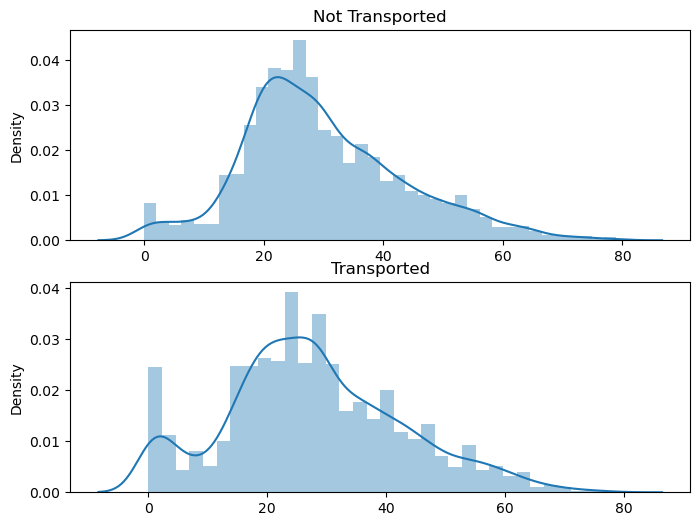

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.distplot(x=train["Age"][train["Transported"]==0],ax = axes[0])
axes[0].set_title("Not Transported")
sns.distplot(x=train["Age"][train["Transported"]==1],ax = axes[1])
axes[1].set_title("Transported")

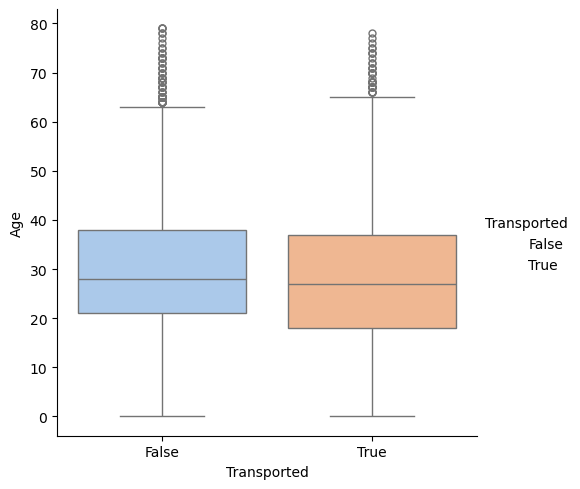

In [51]:
sns.catplot(data=train, x='Transported', y='Age', kind="box",palette=sns.color_palette("pastel"))
plt.show()

Text(0.5, 1.0, 'Transported')

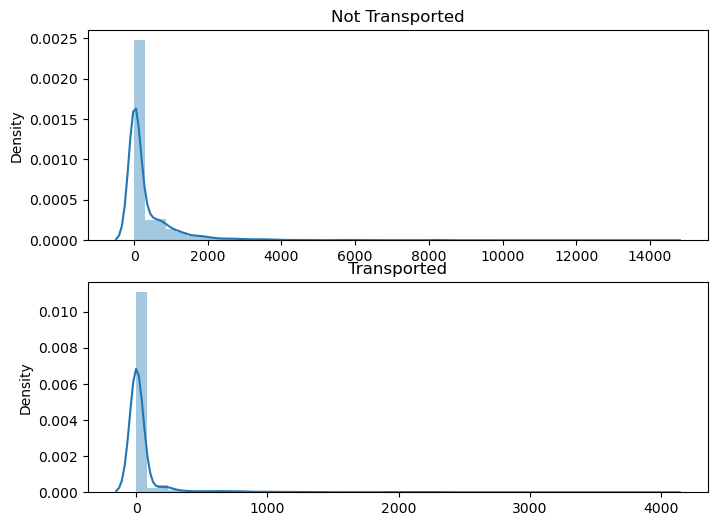

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.distplot(x=train["RoomService"][train["Transported"]==0],ax = axes[0])
axes[0].set_title("Not Transported")
sns.distplot(x=train["RoomService"][train["Transported"]==1],ax = axes[1])
axes[1].set_title("Transported")

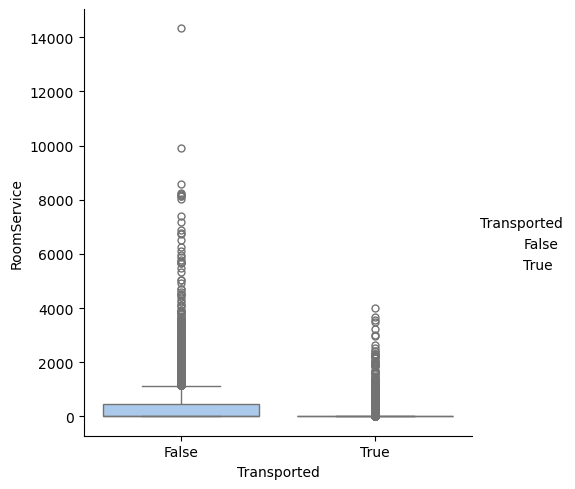

In [53]:
sns.catplot(data=train, x='Transported', y='RoomService', kind="box",palette=sns.color_palette("pastel"))
plt.show()

Text(0.5, 1.0, 'Transported')

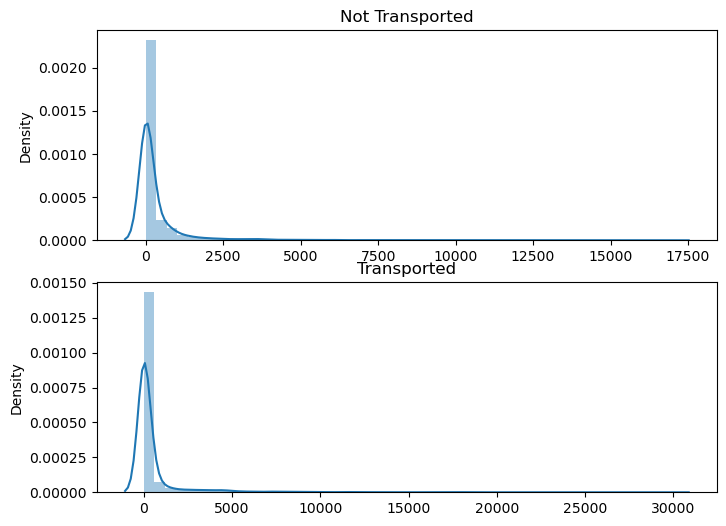

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.distplot(x=train["FoodCourt"][train["Transported"]==0],ax = axes[0])
axes[0].set_title("Not Transported")
sns.distplot(x=train["FoodCourt"][train["Transported"]==1],ax = axes[1])
axes[1].set_title("Transported")

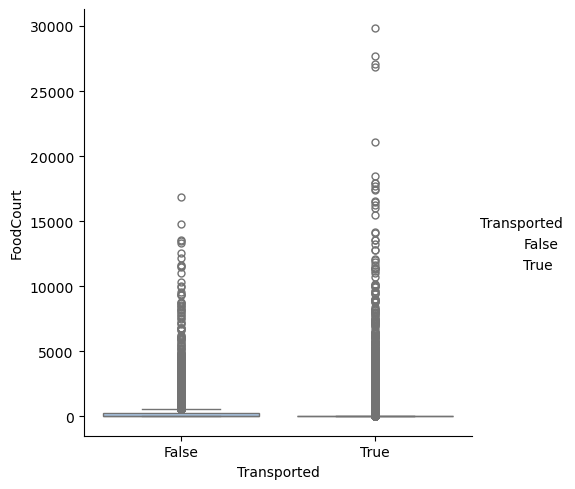

In [55]:
sns.catplot(data=train, x='Transported', y='FoodCourt', kind="box",palette=sns.color_palette("pastel"))
plt.show()

Text(0.5, 1.0, 'Transported')

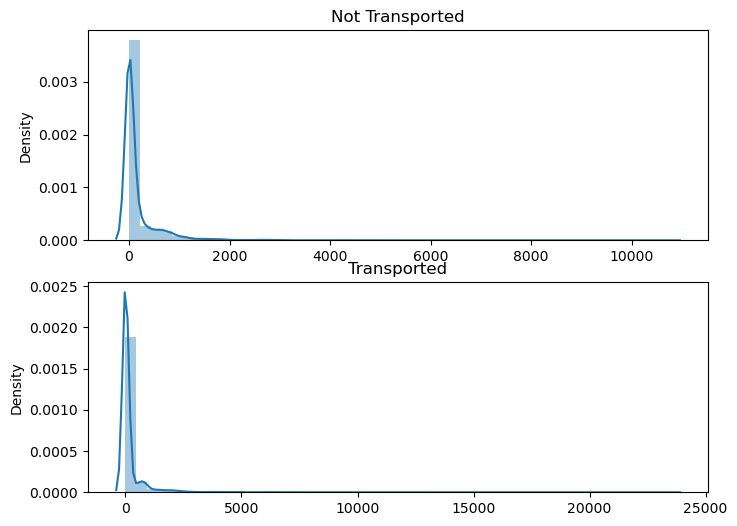

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.distplot(x=train["ShoppingMall"][train["Transported"]==0],ax = axes[0])
axes[0].set_title("Not Transported")
sns.distplot(x=train["ShoppingMall"][train["Transported"]==1],ax = axes[1])
axes[1].set_title("Transported")

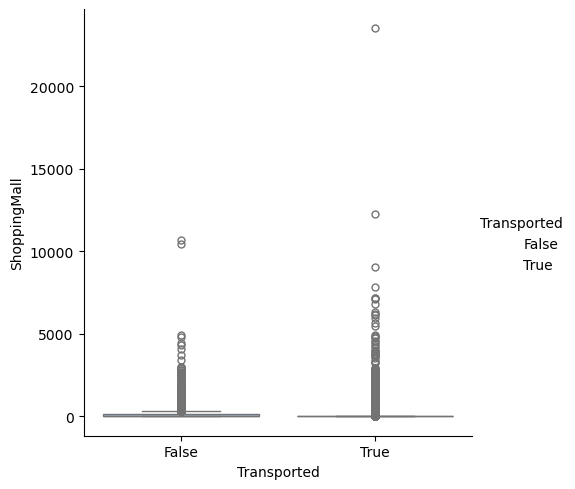

In [57]:
sns.catplot(data=train, x='Transported', y='ShoppingMall', kind="box",palette=sns.color_palette("pastel"))
plt.show()

Text(0.5, 1.0, 'Transported')

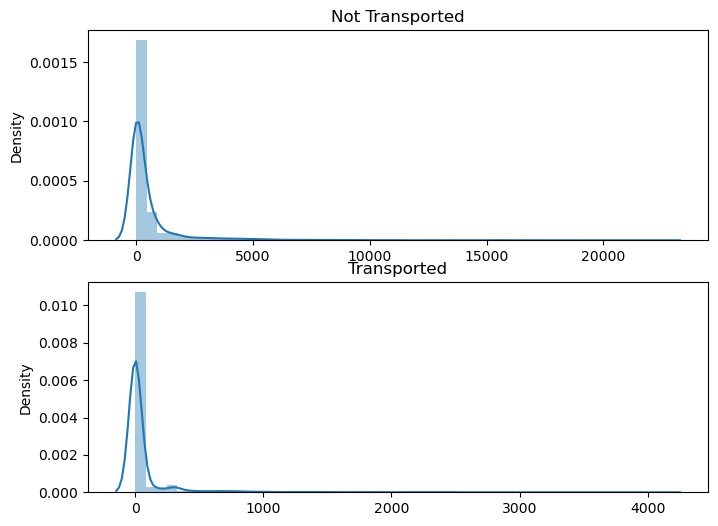

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.distplot(x=train["Spa"][train["Transported"]==0],ax = axes[0])
axes[0].set_title("Not Transported")
sns.distplot(x=train["Spa"][train["Transported"]==1],ax = axes[1])
axes[1].set_title("Transported")

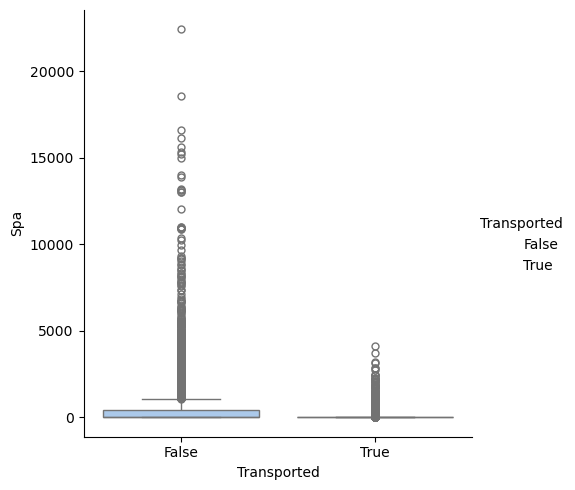

In [59]:
sns.catplot(data=train, x='Transported', y='Spa', kind="box",palette=sns.color_palette("pastel"))
plt.show()

Text(0.5, 1.0, 'Transported')

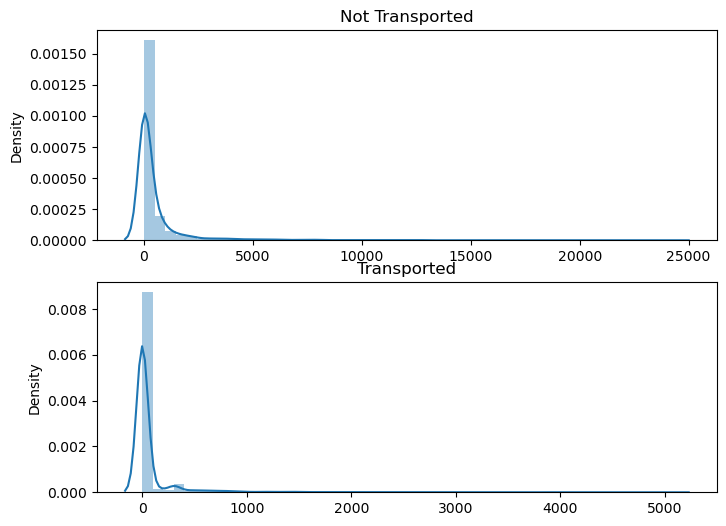

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
sns.distplot(x=train["VRDeck"][train["Transported"]==0],ax = axes[0])
axes[0].set_title("Not Transported")
sns.distplot(x=train["VRDeck"][train["Transported"]==1],ax = axes[1])
axes[1].set_title("Transported")

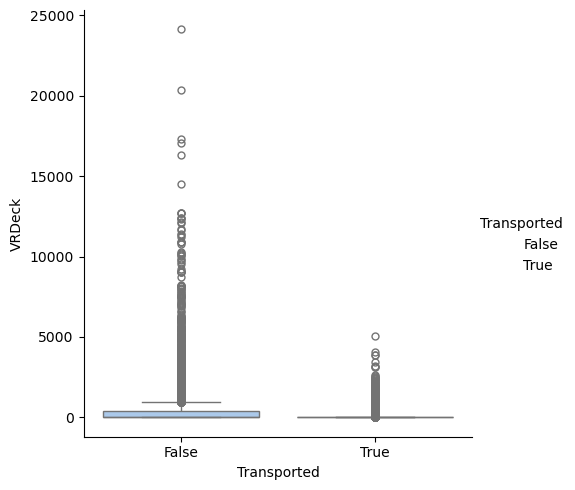

In [61]:
sns.catplot(data=train, x='Transported', y='VRDeck', kind="box",palette=sns.color_palette("pastel"))
plt.show()

# Dealing with DataTypes

In [62]:
def preprocess_dtype(df):
    df['CryoSleep']=df['CryoSleep'].astype(int)
    df['VIP']=df['VIP'].astype(int)

preprocess_dtype(train)

# Data Splitting

In [63]:
y=train['Transported'].astype(int)
x=train.drop('Transported',axis=1)

In [64]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
print(f'Size of x_train:{x_train.shape}')
print(f'Size of y_train:{y_train.shape}')
print(f'Size of x_val:{x_val.shape}')
print(f'Size of y_val:{y_val.shape}')

Size of x_train:(6954, 13)
Size of y_train:(6954,)
Size of x_val:(1739, 13)
Size of y_val:(1739,)


# Data Encoding

In [66]:
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Machine Learning Model

In [67]:

model = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    n_estimators=1000,  
    learning_rate=0.01,  
    max_depth=3,  
    subsample=0.8,  
    colsample_bytree=0.8  
)

In [68]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(h...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [69]:
print(f'Training Accuracy Socre: {clf.score(x_train,y_train)*100}')
print(f'Validation Accuracy Socre: {clf.score(x_val,y_val)*100}')

Training Accuracy Socre: 81.72274949669254
Validation Accuracy Socre: 78.32087406555492


In [70]:
print('\nTraining Classification Report:\n')
print(classification_report(y_train,clf.predict(x_train)))


Training Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      3454
           1       0.80      0.86      0.83      3500

    accuracy                           0.82      6954
   macro avg       0.82      0.82      0.82      6954
weighted avg       0.82      0.82      0.82      6954



In [71]:
print('\nValidation Classification Report:\n')
print(classification_report(y_val,clf.predict(x_val)))


Validation Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       861
           1       0.76      0.83      0.79       878

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.78      0.78      1739




 Training Confusion Matrix: 



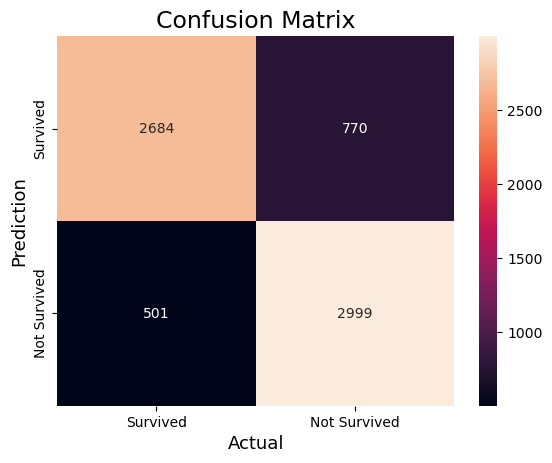

In [72]:
print('\n Training Confusion Matrix: \n')
cm=confusion_matrix(y_train,clf.predict(x_train))

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Survived','Not Survived'],
            yticklabels=['Survived','Not Survived'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


 Validation Confusion Matrix: 



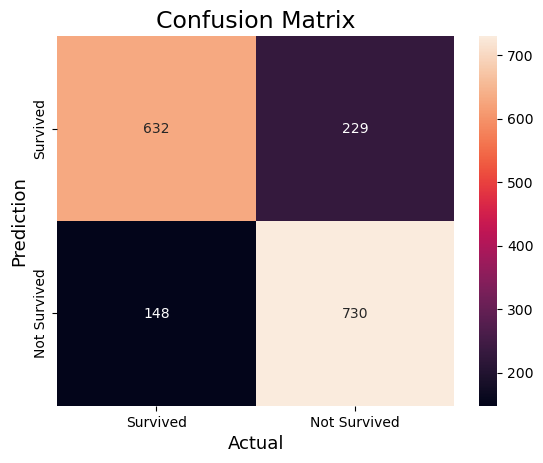

In [73]:
print('\n Validation Confusion Matrix: \n')
cm=confusion_matrix(y_val,clf.predict(x_val))

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Survived','Not Survived'],
            yticklabels=['Survived','Not Survived'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Prediction on Testing Data¶

In [74]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [75]:
test.drop(['PassengerId','Name'],inplace=True,axis=1)

In [76]:
print('Shape of Data:',test.shape)

Shape of Data: (4277, 11)


In [77]:
test.describe(include='all')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4190,4184,4177,4185,4186.000000,4184,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
unique,3,2,3265,3,NaN,2,NaN,NaN,NaN,NaN,NaN
top,Earth,False,G/160/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,2263,2640,8,2956,NaN,4110,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,28.658146,NaN,219.266269,439.484296,177.295525,303.052443,310.710031
std,NaN,NaN,NaN,NaN,14.179072,NaN,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,26.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,37.000000,NaN,53.000000,78.000000,33.000000,50.000000,36.000000


In [78]:
missing=test.isna().sum()
percent=test.isna().sum()*100/test.shape[0]
print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))

              Missing   Percent
HomePlanet         87  2.034136
CryoSleep          93  2.174421
Cabin             100  2.338087
Destination        92  2.151040
Age                91  2.127660
VIP                93  2.174421
RoomService        82  1.917232
FoodCourt         106  2.478373
ShoppingMall       98  2.291326
Spa               101  2.361468
VRDeck             80  1.870470


In [79]:
preprocess_cabin(test)
preprocess_null_values(test)
preprocess_dtype(test)

In [80]:
y_pred=clf.predict(test)

# Saving Prediction File

In [81]:
pred=pd.read_csv('submission.csv')
pred['Transported']=y_pred.astype(bool)

In [82]:
pred.to_csv('submission.csv',index=False)